In [25]:
from gp_master import *
import numpy as np
import matplotlib.pyplot as plt

def branin(params):
    x1 = params[0]
    x2 = params[1]
    a = 1.
    b = 5.1 / (4*(np.pi**2))
    c = 5 / np.pi
    r = 6
    s = 10.
    t = 1. / (8.*np.pi)
    ret  = a*(x2-b*(x1**2)+c*x1-r)**2+s*(1-t)*np.cos(x1)+s
    return ret

In [26]:
def return_mean_std(y_list):
    mean_list = list()
    std_list = list()
    for one_list in y_list:
        mean_list.append(np.mean(one_list))
        std_list.append(np.std(one_list))
    return mean_list, std_list

In [27]:
# set parameters
bounds = np.array([[0, 15], [-5, 15]])
# maxeps specifies how many BOs we want to run
maxeps = 50
# n_iters is number of iterations we want for each run of BO
n_iters = 30
acqui_eva_num = 20
n_pre_samples = 3
y_list = list()
slice_sample_num = 1
coor_sigma = np.array([1.,1.,1.,1.])
burn_in = 50
input_dimension = 2
mode = 'MAP'
acqui_mode = 'MCMC'
acqui_sample_num = 20

In [28]:
y_list = list()
for i in range(n_iters):
    y_list.append(list())


for j in range(maxeps):
    print ('Running %d episode' % (j + 1))
    xp, yp, timep  = bayesian_optimisation(slice_sample_num, 
                                   coor_sigma, 
                                   burn_in, 
                                   input_dimension,
                                   n_iters=n_iters, 
                                   sample_loss=branin, 
                                   bounds=bounds,
                                   n_pre_samples=n_pre_samples,
                                   acqui_eva_num = acqui_eva_num,
                                   random_search=False,
                                   greater_is_better = False,
                                   mode = mode,
                                  acqui_mode = acqui_mode,
                                  acqui_sample_num = acqui_sample_num)
    for idx in range(n_iters):
        y_list[idx].append(np.min(yp[:idx+n_pre_samples+1]))

Running 1 episode
Start pre-sampling...
Pre-sampling finished.
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
15 actucal iterations have been run
#################################

#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
15 actucal iterations have been run
#############################################################
#############################################################
#############################################################
#############################################################
##################################

#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
15 actucal iterations have been run
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
##################################

#############################################################
#############################################################
#############################################################
15 actucal iterations have been run
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
##################################

#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
30 actucal iterations have been run
##################################

#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
30 actucal iterations have been run
#############################################################
Running 22 episode
Start pre-sampling...
Pre-sampling finished.
#############################################################
#############################################################
################################

#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
30 actucal iterations have been run
#############################################################
Running 26 episode
Start pre-sampling...
Pre-sampling finished.
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
################################

#############################################################
#############################################################
#############################################################
30 actucal iterations have been run
#############################################################
Running 30 episode
Start pre-sampling...
Pre-sampling finished.
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
################################

#############################################################
Running 34 episode
Start pre-sampling...
Pre-sampling finished.
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
15 act

#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
15 actucal iterations have been run
#############################################################
#############################################################
#############################################################
##################################

#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
15 actucal iterations have been run
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
##################################

#############################################################
#############################################################
#############################################################
#############################################################
15 actucal iterations have been run
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
##################################

15 actucal iterations have been run
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
#############################################################
30 actucal iterations have been ru

In [19]:
mean_list_MCMC, std_list_MCMC = return_mean_std(y_list)
timep_MCMC = timep

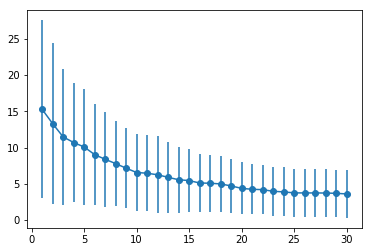

In [20]:
x_MCMC = [i+1 for i in range(len(y_list))]

plt.errorbar(x_MCMC, mean_list_MCMC, yerr = std_list_MCMC, fmt = '-o')

plt.show()

In [21]:
file = open("branin_MCMC.txt", "w")

file.write(str(x_MCMC))

file.write("\n")

file.write(str(mean_list_MCMC))

file.write("\n")

file.write(str(std_list_MCMC))

file.write("\n")

file.write(str(timep_MCMC))

file.close()


In [22]:
bounds = np.array([[0, 15], [-5, 15]])
# maxeps specifies how many BOs we want to run
maxeps = 100
# n_iters is number of iterations we want for each run of BO
n_iters = 30
acqui_eva_num = 20
n_pre_samples = 3
y_list = list()
slice_sample_num = 1
coor_sigma = np.array([0.5,0.5,0.5,0.5])
burn_in = 50
input_dimension = 2
mode = 'OPT'
acqui_mode = 'OPT'
acqui_sample_num = 5

for i in range(n_iters):
    y_list.append(list())


for j in range(maxeps):
    print ('Running %d episode' % (j + 1))
    xp, yp, timep = bayesian_optimisation(slice_sample_num, 
                                   coor_sigma, 
                                   burn_in, 
                                   input_dimension,
                                   n_iters=n_iters, 
                                   sample_loss=branin, 
                                   bounds=bounds,
                                   n_pre_samples=n_pre_samples,
                                   acqui_eva_num = acqui_eva_num,
                                   random_search=False,
                                   greater_is_better = False,
                                   mode = mode,
                                  acqui_mode = acqui_mode,
                                  acqui_sample_num = acqui_sample_num)
    for idx in range(n_iters):
        y_list[idx].append(np.min(yp[:idx+n_pre_samples+1]))

Running 1 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.98841995e-01, -1.21302554e-04,  4.31905254e-04]), 'nit': 28, 'funcalls': 98}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.98797414e-01,  7.65895950e-06, -2.49222698e-05]), 'nit': 33, 'funcalls': 100}
  " state: %s" % convergence_dict)


30 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99391480e-01,  2.31197868e-04, -1.40236462e-03]), 'nit': 22, 'funcalls': 75}
  " state: %s" % convergence_dict)


Running 2 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 3 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 4 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 5 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 6 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 7 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 8 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 9 episode
Start pre-sampling...
Pre-sampling fi

/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.4999246 , -0.0008719 ,  0.00221628]), 'nit': 18, 'funcalls': 73}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99898887e-01, -4.41551057e-04,  2.41684535e-04]), 'nit': 35, 'funcalls': 128}
  " state: %s" % convergence_dict)


30 actucal iterations have been run
Running 16 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 17 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99997510e-01, -1.90675654e-04,  5.03124679e-04]), 'nit': 22, 'funcalls': 80}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99998863e-01, -7.39400384e-05, -1.36059101e-03]), 'nit': 16, 'funcalls': 69}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 5.00042041e-01, -2.73544426e-04,  1.38712651e-03]), 'nit': 20, 'funcalls': 87}
  " state: %s" % convergence_dict)


30 actucal iterations have been run
Running 18 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 19 episode
Start pre-sampling...
Pre-sampling finished.


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.98497479e-01, -2.39396994e-05, -2.94577345e-05]), 'nit': 25, 'funcalls': 91}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.98075553e-01, -3.41946332e-05,  1.71258569e-04]), 'nit': 15, 'funcalls': 66}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.98837407e-01, -5.73760149e-05,  2.06094593e-04]), 'nit': 28, 'funcalls': 96}
  " state: %s" % convergence_dict)
/usr/local

15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99450402e-01,  3.71382994e-04, -1.96415381e-03]), 'nit': 23, 'funcalls': 78}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99548449e-01, -2.81331029e-04,  1.15272967e-03]), 'nit': 22, 'funcalls': 87}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99603176e-01, -3.54733012e-04,  1.05291411e-03]), 'nit': 20, 'funcalls': 79}
  " state: %s" % convergence_dict)
/usr/local

30 actucal iterations have been run
Running 20 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 21 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.32336656e-03,  4.00491961e-06, -2.10267495e-05]), 'nit': 22, 'funcalls': 68}
  " state: %s" % convergence_dict)


30 actucal iterations have been run
Running 22 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 23 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 24 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 25 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 26 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 27 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 28 episode
Start pre-sampling...
Pre-sampling finished.


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99743152e-01, -1.19822989e-06, -3.01658692e-05]), 'nit': 20, 'funcalls': 95}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99712583e-01, -5.48960823e-05,  3.41654769e-05]), 'nit': 35, 'funcalls': 94}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99712595e-01, -1.72635898e-04,  4.14704839e-04]), 'nit': 12, 'funcalls': 64}
  " state: %s" % convergence_dict)


15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99767076e-01, -1.38936307e-04,  2.60442793e-04]), 'nit': 22, 'funcalls': 83}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99794017e-01,  3.14358778e-04, -8.03823070e-04]), 'nit': 29, 'funcalls': 104}
  " state: %s" % convergence_dict)


30 actucal iterations have been run
Running 29 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 30 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 31 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 2.51109171e-02, -3.85779958e-05,  5.27501435e-05]), 'nit': 30, 'funcalls': 108}
  " state: %s" % convergence_dict)


30 actucal iterations have been run
Running 32 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 33 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 34 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 35 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 1.17014272e-06,  2.36184496e-06, -1.34688719e-05]), 'nit': 35, 'funcalls': 93}
  " state: %s" % convergence_dict)


30 actucal iterations have been run
Running 36 episode
Start pre-sampling...
Pre-sampling finished.


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99979797e-01,  1.15707517e-05, -5.14017756e-06]), 'nit': 22, 'funcalls': 88}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99992409e-01, -1.43092257e-04,  4.69635132e-04]), 'nit': 27, 'funcalls': 112}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99993165e-01, -1.30928423e-05,  1.30386445e-05]), 'nit': 25, 'funcalls': 84}
  " state: %s" % convergence_dict)
/usr/loca

15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99991427e-01, -1.62102062e-05,  9.52813812e-05]), 'nit': 32, 'funcalls': 100}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99991610e-01,  1.91660525e-04, -1.26107035e-03]), 'nit': 20, 'funcalls': 81}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99978948e-01, -1.67242565e-04,  4.24253389e-04]), 'nit': 17, 'funcalls': 76}
  " state: %s" % convergence_dict)


30 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.49999759,  0.00063066, -0.00324201]), 'nit': 16, 'funcalls': 74}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99997590e-01, -1.29379831e-04,  4.78397984e-04]), 'nit': 29, 'funcalls': 97}
  " state: %s" % convergence_dict)


Running 37 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.94228869e-01,  9.79006290e-06, -2.20873573e-05]), 'nit': 21, 'funcalls': 76}
  " state: %s" % convergence_dict)


30 actucal iterations have been run
Running 38 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 39 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.86732803e-01,  1.57654285e-05, -2.15520174e-04]), 'nit': 29, 'funcalls': 98}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.88670509e-01, -2.73398805e-05,  5.62477683e-05]), 'nit': 20, 'funcalls': 75}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.97302556e-01, -2.00111499e-05,  5.44205663e-05]), 'nit': 26, 'funcalls': 96}
  " state: %s" % convergence_dict)
/usr/local

30 actucal iterations have been run
Running 40 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 2.27944778e-02, -5.88617280e-05, -1.42390021e-06]), 'nit': 27, 'funcalls': 104}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.19762454,  0.00024283, -0.00073397]), 'nit': 26, 'funcalls': 84}
  " state: %s" % convergence_dict)


30 actucal iterations have been run
Running 41 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 42 episode
Start pre-sampling...
Pre-sampling finished.


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99993402e-01, -3.67359112e-05,  3.83793512e-05]), 'nit': 21, 'funcalls': 85}
  " state: %s" % convergence_dict)


15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99983067e-01, -4.27571646e-06,  1.45005876e-05]), 'nit': 17, 'funcalls': 69}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99983045e-01,  1.07769760e-05, -4.10020600e-05]), 'nit': 13, 'funcalls': 63}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99993869e-01, -1.62547822e-05,  2.48746953e-05]), 'nit': 17, 'funcalls': 76}
  " state: %s" % convergence_dict)
/usr/local

30 actucal iterations have been run
Running 43 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 44 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00477088,  0.00012699, -0.00026949]), 'nit': 14, 'funcalls': 60}
  " state: %s" % convergence_dict)


30 actucal iterations have been run
Running 45 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 46 episode
Start pre-sampling...
Pre-sampling finished.


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 3.59178747e-01, -1.99109316e-04, -2.48661422e-05]), 'nit': 10, 'funcalls': 77}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 3.59176606e-01,  2.11596489e-05, -2.68622326e-05]), 'nit': 20, 'funcalls': 84}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.75178432e-01,  4.18306593e-04, -4.73472881e-04]), 'nit': 19, 'funcalls': 90}
  " state: %s" % convergence_dict)
/usr/local

15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.93656060e-01,  2.15700763e-04, -5.85097985e-04]), 'nit': 20, 'funcalls': 75}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.92956704e-01,  1.94169681e-04, -1.35337370e-03]), 'nit': 34, 'funcalls': 94}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.49295973,  0.00258253, -0.00669265]), 'nit': 28, 'funcalls': 115}
  " state: %s" % convergence_dict)
/usr/local/lib/python

30 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.96678544e-01, -4.10036341e-05,  1.46733545e-04]), 'nit': 14, 'funcalls': 66}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.96678556e-01, -3.96756886e-05,  4.85487182e-04]), 'nit': 24, 'funcalls': 83}
  " state: %s" % convergence_dict)


Running 47 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 1.89986812e-02,  9.36451972e-05, -4.57610848e-04]), 'nit': 27, 'funcalls': 82}
  " state: %s" % convergence_dict)


30 actucal iterations have been run
Running 48 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.82248926e-01, -1.91870910e-04,  6.14354400e-04]), 'nit': 23, 'funcalls': 81}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.83130882e-01, -7.19249022e-06,  9.27373615e-05]), 'nit': 23, 'funcalls': 78}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.83458890e-01,  6.51396443e-05, -5.52928701e-04]), 'nit': 31, 'funcalls': 89}
  " state: %s" % convergence_dict)
/usr/local

30 actucal iterations have been run
Running 49 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([9.29354299e-02, 9.36692736e-05, 1.84517745e-06]), 'nit': 20, 'funcalls': 73}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.08830461,  0.00030298, -0.00040078]), 'nit': 21, 'funcalls': 89}
  " state: %s" % convergence_dict)


30 actucal iterations have been run
Running 50 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.49771174, -0.00092304,  0.00280385]), 'nit': 32, 'funcalls': 99}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.97711826e-01, -8.83340836e-05,  5.78251836e-04]), 'nit': 18, 'funcalls': 71}
  " state: %s" % convergence_dict)


Running 51 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 52 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 53 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 54 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 55 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99996851e-01, -3.27765342e-04, -4.52863853e-04]), 'nit': 27, 'funcalls': 90}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 5.00004537e-01, -3.12474109e-04,  8.78806704e-04]), 'nit': 30, 'funcalls': 91}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 5.00006508e-01, -1.42144021e-05,  1.43023771e-04]), 'nit': 26, 'funcalls': 97}
  " state: %s" % convergence_dict)


30 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 5.00007822e-01, -4.09269474e-04,  1.26540563e-03]), 'nit': 28, 'funcalls': 87}
  " state: %s" % convergence_dict)


Running 56 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 57 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 58 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 59 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 60 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 61 episode
Start pre-sampling...
Pre-sampling finished.


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99993022e-01, -1.24573708e-05,  7.24626178e-06]), 'nit': 30, 'funcalls': 93}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99994181e-01, -4.83738256e-05,  1.64924290e-04]), 'nit': 17, 'funcalls': 76}
  " state: %s" % convergence_dict)


15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99994800e-01,  5.31198547e-06, -8.21491257e-05]), 'nit': 20, 'funcalls': 95}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99994846e-01, -1.77691774e-05,  2.88605856e-05]), 'nit': 19, 'funcalls': 78}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99994772e-01,  3.97271461e-04, -1.68499398e-03]), 'nit': 19, 'funcalls': 69}
  " state: %s" % convergence_dict)
/usr/local

30 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99998492e-01, -9.80644495e-06,  1.46604517e-04]), 'nit': 24, 'funcalls': 92}
  " state: %s" % convergence_dict)


Running 62 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 63 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 64 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 65 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 66 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 67 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 68 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 69 episode
Start pre-sampling...
Pre-sam

/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 2.73069297e-01, -1.24895251e-04,  3.44279400e-04]), 'nit': 24, 'funcalls': 86}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 3.03061535e-01, -3.10086318e-06,  2.39755818e-05]), 'nit': 23, 'funcalls': 78}
  " state: %s" % convergence_dict)


30 actucal iterations have been run
Running 78 episode
Start pre-sampling...
Pre-sampling finished.


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99149591e-01, -2.53545321e-05,  9.18859884e-06]), 'nit': 22, 'funcalls': 94}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99955441e-01,  4.43482879e-05, -6.90887322e-05]), 'nit': 17, 'funcalls': 68}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99745131e-01, -2.15058755e-04, -7.74503942e-05]), 'nit': 14, 'funcalls': 63}
  " state: %s" % convergence_dict)
/usr/local

15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99957794e-01, -1.15708408e-05, -6.99904684e-05]), 'nit': 23, 'funcalls': 86}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99975526e-01,  1.36699475e-04, -3.60001041e-04]), 'nit': 23, 'funcalls': 96}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99980245e-01,  2.72543225e-06, -1.45244877e-05]), 'nit': 21, 'funcalls': 72}
  " state: %s" % convergence_dict)
/usr/local

30 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99990900e-01, -1.70943999e-04,  5.83809953e-04]), 'nit': 35, 'funcalls': 104}
  " state: %s" % convergence_dict)


Running 79 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 80 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 81 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.57638751e-03, -1.29753403e-05,  2.32055514e-05]), 'nit': 17, 'funcalls': 69}
  " state: %s" % convergence_dict)


30 actucal iterations have been run
Running 82 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 83 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 84 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 85 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 86 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 1.62488967e-03,  2.47829739e-05, -3.33160013e-05]), 'nit': 20, 'funcalls': 68}
  " state: %s" % convergence_dict)


30 actucal iterations have been run
Running 87 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 88 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 89 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 90 episode
Start pre-sampling...
Pre-sampling finished.


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([4.99994754e-01, 4.03426900e-05, 3.32265507e-04]), 'nit': 27, 'funcalls': 85}
  " state: %s" % convergence_dict)


15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99995512e-01, -4.50266760e-04,  1.57182704e-03]), 'nit': 21, 'funcalls': 83}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99994812e-01,  2.17488657e-04, -7.43032115e-04]), 'nit': 36, 'funcalls': 126}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.49999653, -0.00060124,  0.00108751]), 'nit': 34, 'funcalls': 105}
  " state: %s" % convergence_dict)
/usr/local/lib/pytho

30 actucal iterations have been run
Running 91 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 1.50786822e-03, -6.65493922e-05,  2.42931693e-04]), 'nit': 15, 'funcalls': 58}
  " state: %s" % convergence_dict)


30 actucal iterations have been run
Running 92 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 93 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 94 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 95 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 96 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 97 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 98 episode
Start pre-sampling...
Pre-sampling finished.
15 actucal iterations have been run
30 actucal iterations have been run
Running 99 e

/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99995036e-01,  7.79247552e-05, -1.33855978e-04]), 'nit': 23, 'funcalls': 74}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99995199e-01, -1.71324614e-04,  1.84977518e-04]), 'nit': 19, 'funcalls': 76}
  " state: %s" % convergence_dict)


15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99998666e-01, -6.22631915e-07,  3.08298436e-05]), 'nit': 19, 'funcalls': 74}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99998997e-01,  1.19795869e-04, -6.86585379e-04]), 'nit': 33, 'funcalls': 104}
  " state: %s" % convergence_dict)


30 actucal iterations have been run
Running 100 episode
Start pre-sampling...
Pre-sampling finished.


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99776152e-01,  4.40515004e-05, -7.70973593e-05]), 'nit': 31, 'funcalls': 115}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99776152e-01, -6.46691098e-05,  3.75111510e-05]), 'nit': 22, 'funcalls': 101}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99776061e-01,  5.95133276e-05, -1.19601565e-04]), 'nit': 23, 'funcalls': 87}
  " state: %s" % convergence_dict)
/usr/loc

15 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99946309e-01, -1.89954578e-05,  5.57356544e-05]), 'nit': 17, 'funcalls': 65}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99949046e-01, -5.06431203e-06,  1.21621828e-05]), 'nit': 31, 'funcalls': 103}
  " state: %s" % convergence_dict)
/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99949137e-01, -1.90405762e-05,  5.04636803e-05]), 'nit': 30, 'funcalls': 93}
  " state: %s" % convergence_dict)
/usr/loca

30 actucal iterations have been run


/usr/local/lib/python2.7/dist-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 4.99984831e-01, -8.06254076e-06,  6.03409663e-05]), 'nit': 24, 'funcalls': 86}
  " state: %s" % convergence_dict)


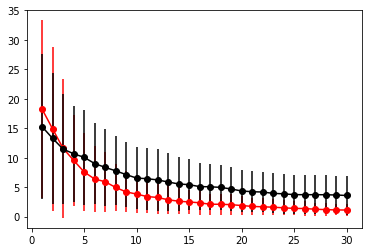

In [23]:
mean_list_OPT, std_list_OPT = return_mean_std(y_list)
timep_OPT = timep

x_OPT = [i+1 for i in range(len(y_list))]

plt.errorbar(x_OPT, mean_list_OPT, yerr = std_list_OPT, fmt = '-o', c="red")
plt.errorbar(x_MCMC, mean_list_MCMC, yerr = std_list_MCMC, fmt = '-o', c="black")

plt.show()

In [24]:
file = open("branin_OPT.txt", "w")

file.write(str(x_OPT))

file.write("\n")

file.write(str(mean_list_OPT))

file.write("\n")

file.write(str(std_list_OPT))

file.write("\n")

file.write(str(timep_OPT))

file.close()
